# Regresión lineal de la diabetes

http://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
diabetes = datasets.load_diabetes()

In [72]:
type(diabetes)

sklearn.utils.Bunch

In [73]:
diabetes.data.shape #Variable x

(442, 10)

In [74]:
x = diabetes.data[:, np.newaxis,2] #selecciona una columna o dimensión. newaxis cambia la estructura de los datos. Los datos de partida tienen que ser vectores. 

In [75]:
y = diabetes.target #Variable a predecir

In [76]:
mod = linear_model.LinearRegression() # creamos el modelo

In [77]:
mod.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
mod.coef_ # https://economipedia.com/definiciones/coeficiente-de-correlacion-lineal.html

array([949.43526038])

In [79]:
mod.intercept_ # http://biplot.usal.es/problemas/regresion/teoria/regsimple.htm

152.1334841628967

$$\tilde{y} = 69.71535568\cdot x + 152.13348416289594 $$

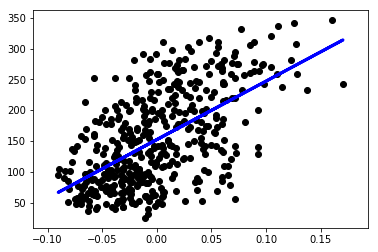

In [80]:
plt.scatter(x,y, color = 'black')
plt.plot(x, mod.predict(x), color='blue', linewidth=3)

$$MSE = \frac{\sum_{i=1}^n(y_i - \tilde{y_i})^2}{n}}$$

In [81]:
mean_squared_error(y, mod.predict(x))

3890.4565854612724

In [82]:
r2_score(y, mod.predict(x)) # No se ve que el modelo sea lineal

0.3439237602253803

# Separando conjunto de test y training

## Train

In [83]:
x_train = x[:~60] #toma dotos los datos menos los ultimos 60 (alrededir del 20%)
x_test = x[~60:] #toma el resto de los dotos (alrededir del 80%)

y_train = y[:~60]
y_test = y[~60:]

In [84]:
mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
mod.coef_ # https://economipedia.com/definiciones/coeficiente-de-correlacion-lineal.html

array([943.75494914])

In [86]:
mod.intercept_ # http://biplot.usal.es/problemas/regresion/teoria/regsimple.htm

152.7093103622863

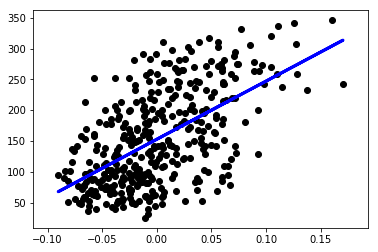

In [87]:
plt.scatter(x_train,y_train, color = 'black')
plt.plot(x_train, mod.predict(x_train), color='blue', linewidth=3)

In [88]:
mean_squared_error(y_train, mod.predict(x_train))

3961.1232492714225

In [89]:
r2_score(y_train, mod.predict(x_train)) # No se ve que el modelo sea lineal

0.33299604701457275

## Testing

In [96]:
y_pred = mod.predict(x_test) # Hace la predicción con el modelo entrenado

In [97]:
mean_squared_error(y_test, y_pred)

3452.0110696099555

In [98]:
r2_score(y_test, y_pred)

0.41046101454020256

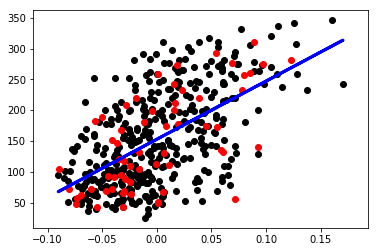

In [99]:
plt.scatter(x_train,y_train, color = 'black')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, mod.predict(x_train), color='blue', linewidth=3)